## 1.引言
真实数据集中不同维度的数据通常具有高度的相关性，这是因为不同的属性往往是由相同的基础过程以密切相关的方式产生的。在古典统计学中，这被称为——回归建模，一种参数化的相关性分析。   

一类相关性分析试图通过其他变量预测单独的属性值，另一类方法用一些潜在变量来代表整个数据。前者的代表是 线性回归，后者一个典型的例子是 主成分分析。本文将会用这两种典型的线性相关分析方法进行异常检测。

  需要明确的是，这里有两个重要的假设：

  假设一：近似线性相关假设。线性相关假设是使用两种模型进行异常检测的重要理论基础。

  假设二：子空间假设。子空间假设认为数据是镶嵌在低维子空间中的，线性方法的目的是找到合适的低维子空间使得异常点(o)在其中区别于正常点(n)。

  基于这两点假设，在异常检测的第一阶段，为了确定特定的模型是否适合特定的数据集，对数据进行探索性和可视化分析是非常关键的。

## 2.数据可视化
以**breast-cancer-unsupervised-ad**数据集为例做一个简单的数据可视化

In [1]:
# coding:utf-8
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [9]:
f = open('breast-cancer-unsupervised-ad.csv')
Train_data = pd.read_csv(f, header = None)

In [10]:
Train_data.head()

0      1       2       3        4   ...      26      27      28       29  30
0  17.99  10.38  122.80  1001.0  0.11840  ...  0.7119  0.2654  0.4601  0.11890   o
1  20.57  17.77  132.90  1326.0  0.08474  ...  0.2416  0.1860  0.2750  0.08902   o
2  19.69  21.25  130.00  1203.0  0.10960  ...  0.4504  0.2430  0.3613  0.08758   o
3  11.42  20.38   77.58   386.1  0.14250  ...  0.6869  0.2575  0.6638  0.17300   o
4  20.29  14.34  135.10  1297.0  0.10030  ...  0.4000  0.1625  0.2364  0.07678   o

[5 rows x 31 columns]

In [11]:
Train_data.tail()

0      1      2      3        4   ...      26       27      28       29  30
362  14.59  22.68  96.39  657.1  0.08473  ...  0.3662  0.11050  0.2258  0.08004   n
363  11.51  23.93  74.52  403.5  0.09261  ...  0.3630  0.09653  0.2112  0.08732   n
364  14.05  27.15  91.38  600.4  0.09929  ...  0.1326  0.10480  0.2250  0.08321   n
365  11.20  29.37  70.67  386.0  0.07449  ...  0.0000  0.00000  0.1566  0.05905   n
366   7.76  24.54  47.92  181.0  0.05263  ...  0.0000  0.00000  0.2871  0.07039   n

[5 rows x 31 columns]

In [12]:
Train_data.describe()

0           1           2   ...          27          28          29
count  367.000000  367.000000  367.000000  ...  367.000000  367.000000  367.000000
mean    12.251060   17.934768   78.842343  ...    0.078041    0.273496    0.080501
std      1.951637    3.994254   13.055722  ...    0.041798    0.049390    0.016395
min      6.981000    9.710000   43.790000  ...    0.000000    0.156600    0.055210
25%     11.135000   15.150000   71.095000  ...    0.052595    0.240800    0.070160
50%     12.230000   17.460000   78.310000  ...    0.076320    0.269100    0.077320
75%     13.455000   19.875000   86.735000  ...    0.099515    0.301500    0.086830
max     20.570000   33.810000  135.100000  ...    0.265400    0.663800    0.207500

[8 rows x 30 columns]

In [13]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       367 non-null    float64
 1   1       367 non-null    float64
 2   2       367 non-null    float64
 3   3       367 non-null    float64
 4   4       367 non-null    float64
 5   5       367 non-null    float64
 6   6       367 non-null    float64
 7   7       367 non-null    float64
 8   8       367 non-null    float64
 9   9       367 non-null    float64
 10  10      367 non-null    float64
 11  11      367 non-null    float64
 12  12      367 non-null    float64
 13  13      367 non-null    float64
 14  14      367 non-null    float64
 15  15      367 non-null    float64
 16  16      367 non-null    float64
 17  17      367 non-null    float64
 18  18      367 non-null    float64
 19  19      367 non-null    float64
 20  20      367 non-null    float64
 21  21      367 non-null    float64
 22  22

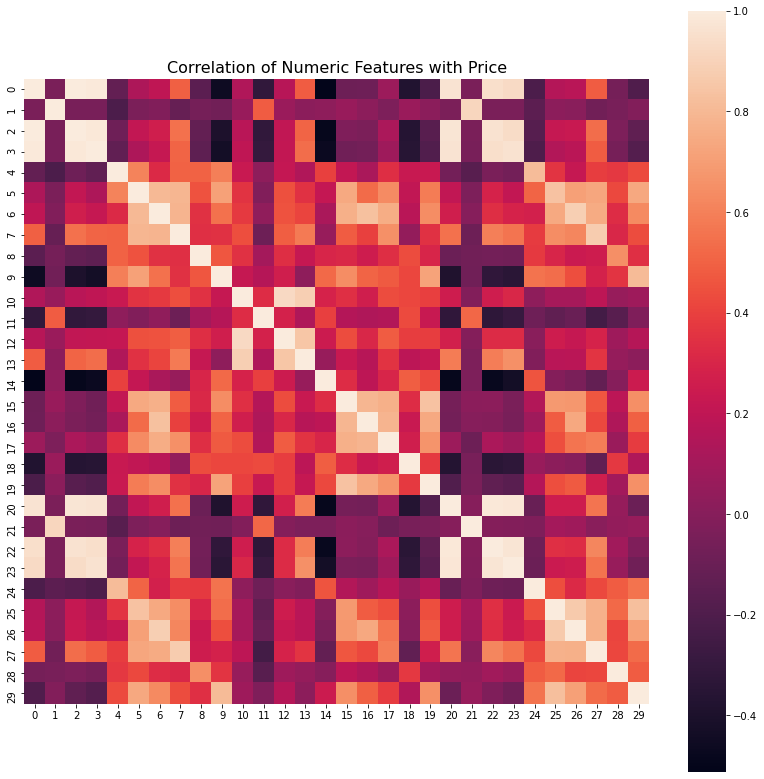

In [19]:
numeric_features = [i for i in range(30)]

# 1. 相关性分析
numeric = Train_data[numeric_features]
correlation = numeric.corr()

f, ax = plt.subplots(figsize = (14, 14))

sns.heatmap(correlation,square = True)
plt.title('Correlation of Numeric Features with Price',y=1,size=16)
plt.show()

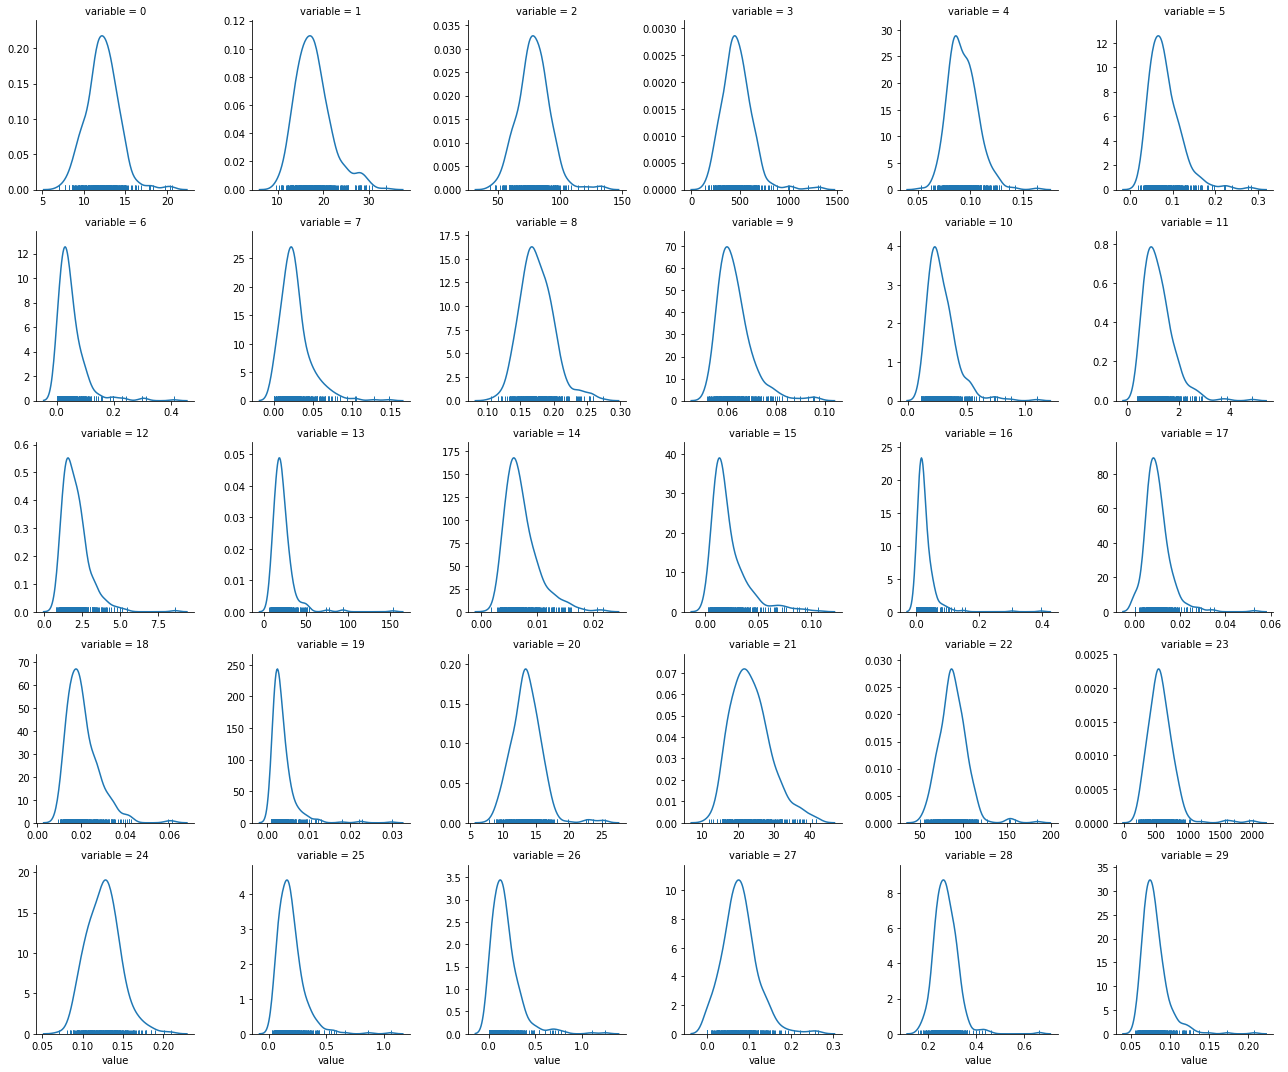

In [20]:
# 2. 数字特征 => 分布可视化
f = pd.melt(Train_data, value_vars = numeric_features)
g = sns.FacetGrid(f, col = "variable", col_wrap = 6, sharex = False, sharey = False)
g = g.map(sns.distplot, "value", hist = False, rug = True)

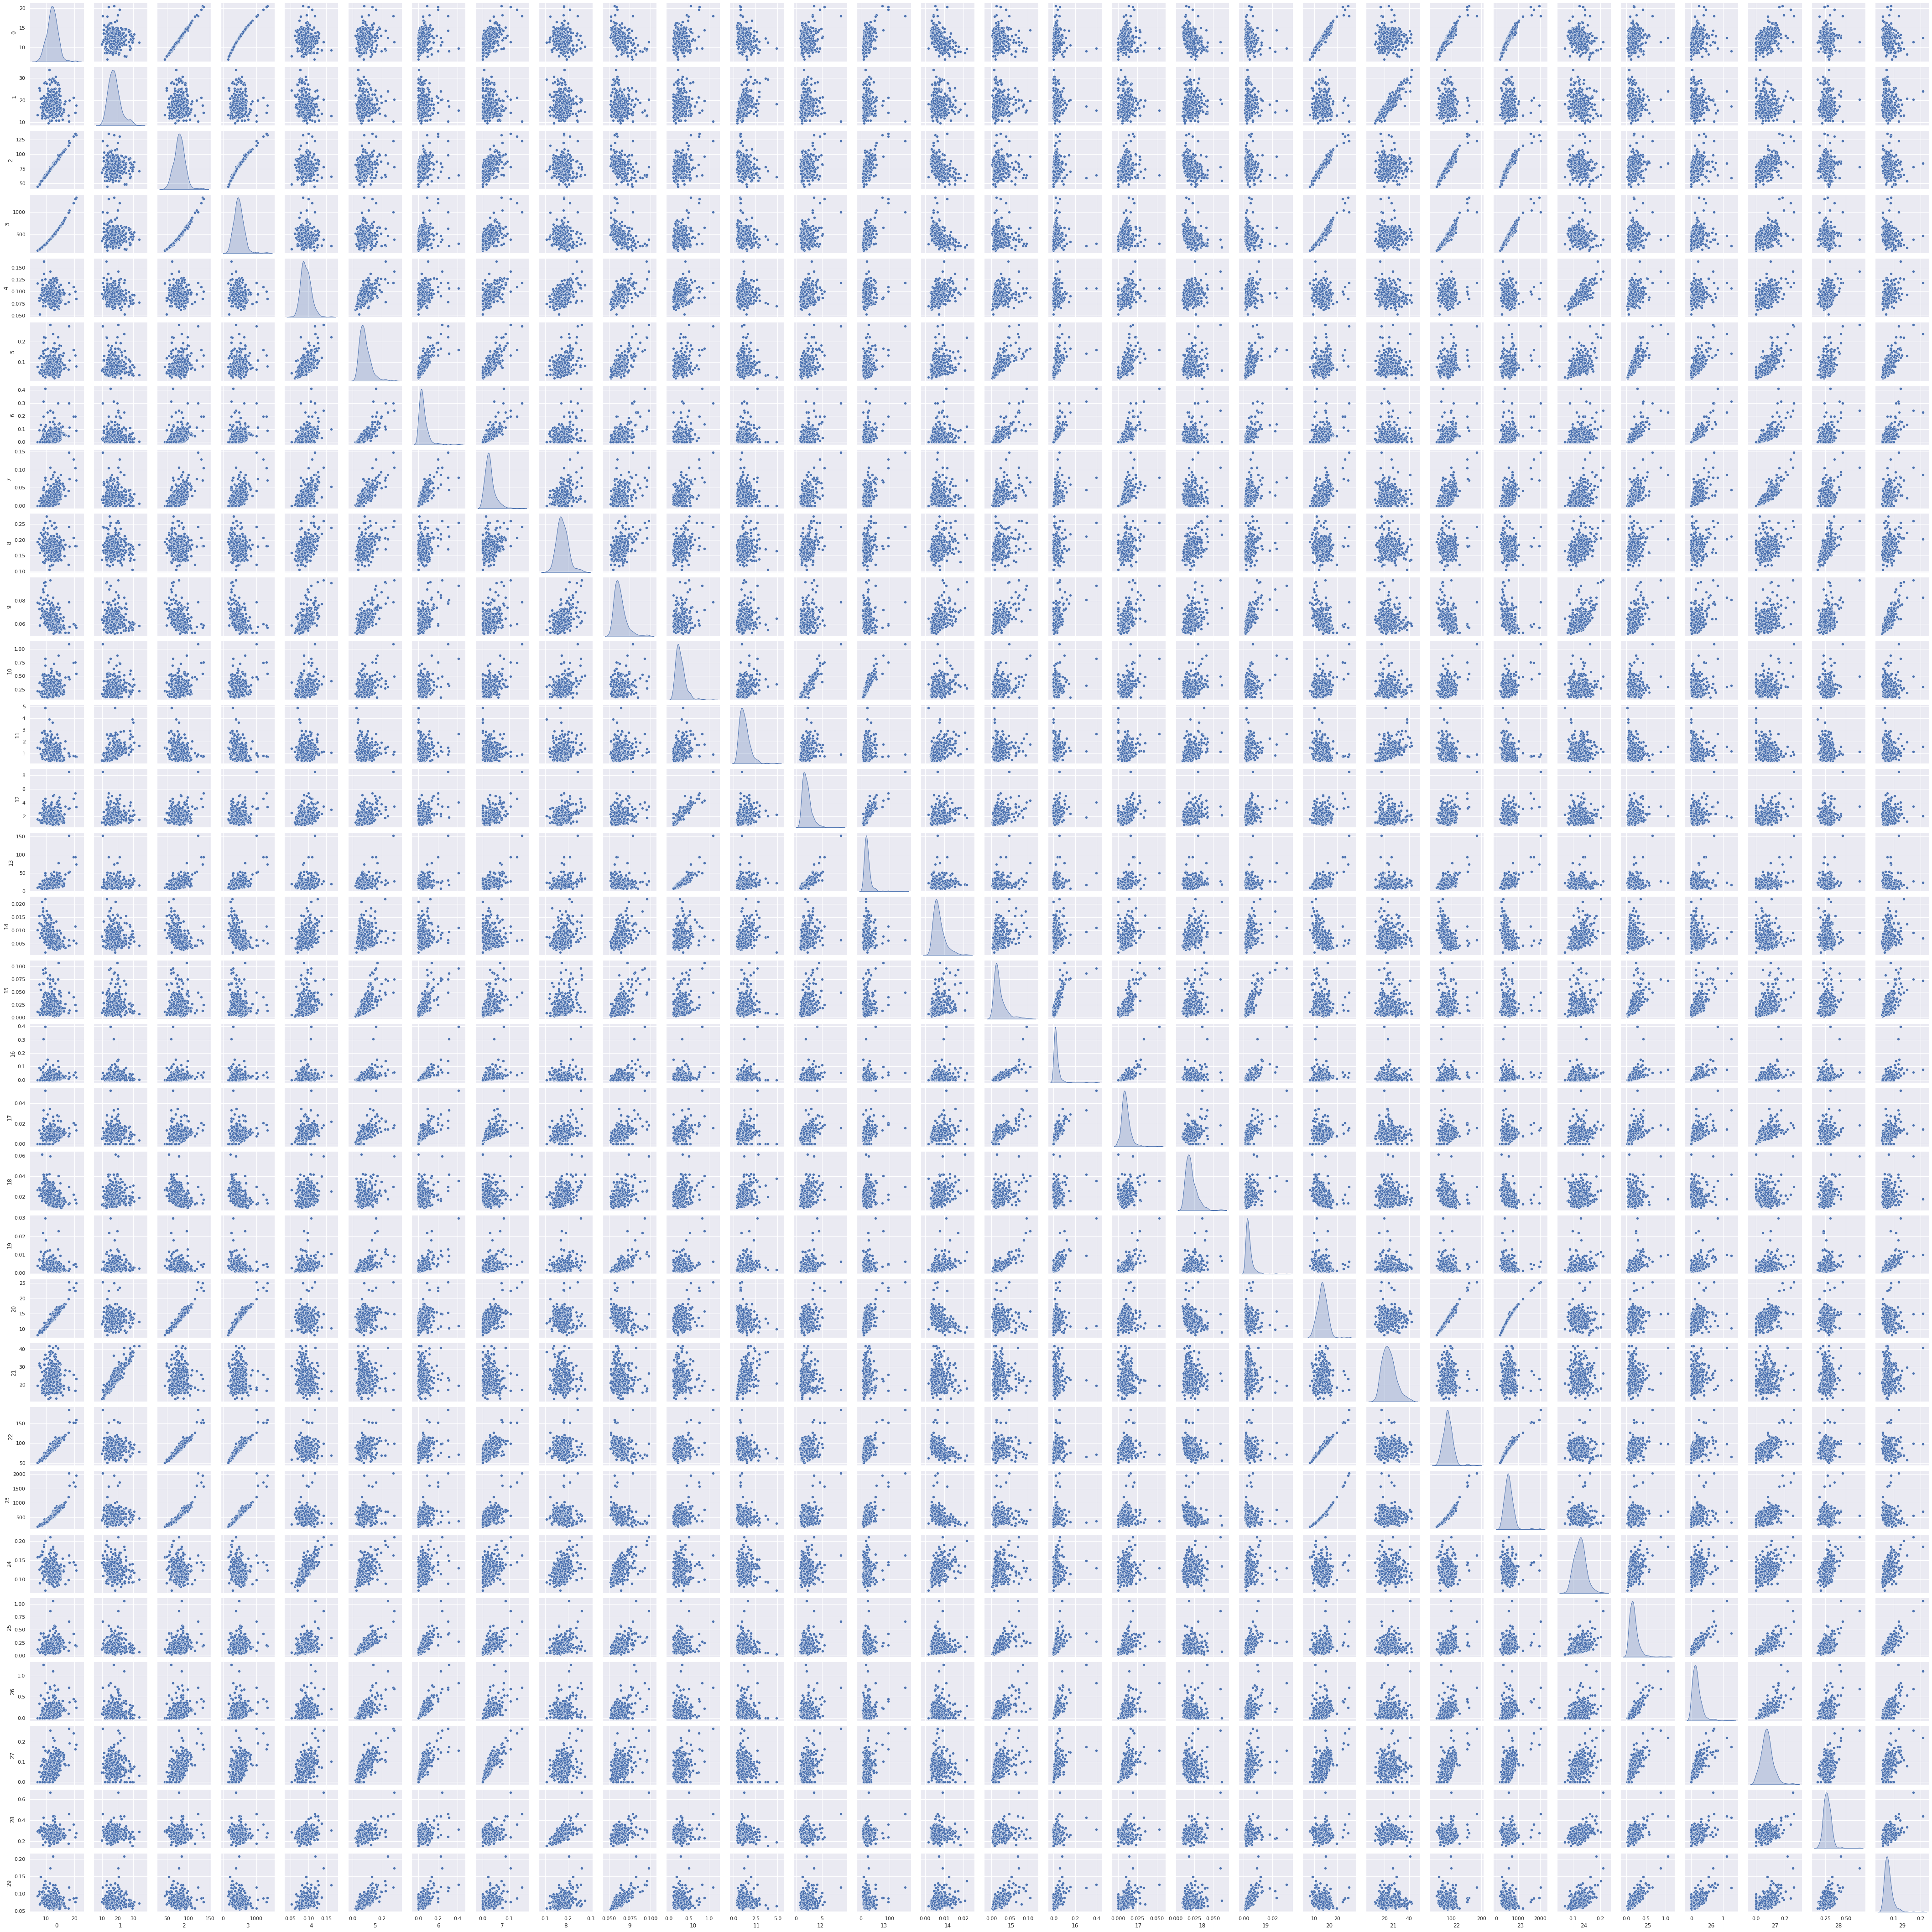

In [21]:
# 变量两两之间的相关性
sns.set()
sns.pairplot(Train_data[numeric_features],size = 2 ,kind ='scatter',diag_kind='kde')
plt.savefig('correlation.png')
plt.show()

## 3.线性回归

  在线性回归中，我们假设不同维度的变量具有一定的相关性，并可以通过一个相关系数矩阵进行衡量。因此对于特定的观测值，可以通过线性方程组来建模。在实际应用中，观测值的数量往往远大于数据的维度，导致线性方程组是一个超定方程，不能直接求解。因此需要通过优化的方法，最小化模型预测值与真实数据点的误差。

  线性回归是统计学中一个重要的应用，这个重要的应用往往是指通过一系列自变量去预测一个特殊因变量的值。在这种情况下，异常值是根据其他自变量对因变量的影响来定义的，而自变量之间相互关系中的异常则不那么重要。这里的异常点检测主要用于数据降噪，避免异常点的出现对模型性能的影响，因而这里关注的兴趣点主要是正常值(n)。

  而我们通常所说的异常检测中并不会对任何变量给与特殊对待，异常值的定义是基于基础数据点的整体分布，这里我们关注的兴趣点主要是异常值(o)。

> 广义的回归建模只是一种工具，这种工具既可以用来进行数据降噪也可以进行异常点检测。

### 3.1基于自变量与因变量的线性回归

#### 3.1.1最小二乘法

  为了简单起见，这里我们一元线性回归为例:

$$Y=\sum_{i=1}^{d} a_{i} \cdot X_{i}+a_{d+1}$$

  变量Y为因变量，也就是我们要预测的值；$X_{1}...X_{d}$为一系列因变量，也就是输入值。系数$a_{1}...a_{d+1}$为要学习的参数。假设数据共包含$N$个样本，第$j$个样本包含的数据为$x_{j1}...x_{jd}$和$y_{j}$，带入式(1)如下式所示：

$$y_{j}=\sum_{i=1}^{d} a_{i} \cdot x_{j i}+a_{d+1}+\epsilon_{j}$$

  这里$\epsilon_{j}$为第$j$个样本的误差。以$Y$ 代表 $N \times 1$ 的因变量矩阵${(y_{1}...y_{N})}^{T}$，即样本中的真实值；以$U$代表$N \times (d+1)$的自变量矩阵，其中第$j$行为$(x_{j1}...x_{jd}, 1)$；以$A$ 代表 $(d+1) \times 1$ 的系数矩阵$(a_{1}...a_{d+1})^{T}$。则模型可表示为： $$f(U, A) = U \cdot A$$

  定义目标函数为：

$$L(A) = \frac{1}{2}{\left| {Y - U \cdot A} \right|^2} $$

  目标函数是关于$A$的凸函数，其对$A$求偏导为：

$$\frac{{\partial L(A)}}{{\partial A}} = \frac{1}{2}\frac{{\partial {{\left| {Y - U \cdot A} \right|}^2}}}{{\partial A}} = - {U^T}(Y - U \cdot A)$$

  令$\frac{{\partial L(A)}}{{\partial A}}=0$，得到最优参数为：

$$A=\left(U^{T} \cdot U\right)^{-1} \cdot\left(U^{T} \cdot Y\right)$$

  这种求解线性回归参数的方法也叫**最小二乘法**。

  最小二乘法要求矩阵 $U^{T} \cdot U$ 可逆，即$U^{T} \cdot U$是满秩的。当$U^{T} \cdot U$不可逆时可以通过两种方法进行参数估计，一种先使用主成分分析等方法来预处理数据，消除不同特征之间的相关性，然后再使用最小二乘法。第二种方法是使用**梯度下降法**。

#### 3.1.2梯度下降法
**数据集**

  监督学习一般靠数据驱动。我们通常收集一系列的真实数据，例如多栋房屋的真实售出价格和它们对应的面积和房龄。我们希望在这个数据上面寻找模型参数来使模型的预测价格与真实价格的误差最小。在机器学习术语里，该数据集被称为训练数据集（training data set）或训练集（training set），通常还应该有一个用于防止过拟合的交叉验证集和一个用于评估模型性能的测试集(test set)。一栋房屋被称为一个样本（sample），其真实售出价格叫作标签（label），用来预测标签的两个因素叫作特征（feature）。

**损失函数**

  如果把线性回归看作是一个优化问题，那么我们要优化的目标就是损失函数。损失函数是用来衡量样本误差的函数，我们的优化目标是要求得在误差最小的情况下模型参数的值。这里强调一下损失函数和代价函数的区别：

注意： **Loss Function(损失函数)：**the error for single training example; **Cost Function(代价函数)：**the average of the loss functions of the entire training set;

  线性回归常用的损失函数是均方误差，表达式为：

$$l^{(i)}(\mathbf{w}, b)=\frac{1}{2}\left(\hat{y}^{(i)}-y^{(i)}\right)^{2}$$

$$ L(\mathbf{w}, b)=\frac{1}{n} \sum_{i=1}^{n} l^{(i)}(\mathbf{w}, b)=\frac{1}{n} \sum_{i=1}^{n} \frac{1}{2}\left(\mathbf{w}^{\top} \mathbf{x}^{(i)}+b-y^{(i)}\right)^{2} $$   其中 $\hat{y}$ 为预测值，$y$ 为真实值。 优化算法 - 随机梯度下降

  当模型和损失函数形式较为简单时，上面的误差最小化问题的解可以直接用公式表达出来。这类解叫作解析解（analytical solution）。本节使用的线性回归和平方误差刚好属于这个范畴。然而，大多数深度学习模型并没有解析解，只能通过优化算法有限次迭代模型参数来尽可能降低损失函数的值。这类解叫作数值解（numerical solution）。

  在求数值解的优化算法中，小批量随机梯度下降（mini-batch stochastic gradient descent）被广泛使用。它的算法很简单：先选取一组模型参数的初始值，如随机选取；接下来对参数进行多次迭代，使每次迭代都可能降低损失函数的值。在每次迭代中，先随机均匀采样一个由固定数目训练数据样本所组成的小批量（mini-batch），然后求小批量中数据样本的平均损失和有关模型参数的导数（梯度），最后用此结果与预先设定的学习率的乘积作为模型参数在本次迭代的减小量。如下式所示：

$$ (\mathbf{w}, b) \leftarrow(\mathbf{w}, b)-\frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \partial_{(\mathbf{w}, b)} l^{(i)}(\mathbf{w}, b) $$

学习率($\eta$): 代表在每次优化中，能够学习的步长的大小 批量大小($B$): 是小批量计算中的批量大小batch size

## 3.2基于异常检测的线性回归

 前一节讨论了这样一种情况：即一个特定的变量被认为是特殊的，最优平面是通过最小化该特殊变量的均方误差而确定的。而我们通常所说的异常检测中并不会对任何变量给与特殊对待，异常值的定义是基于基础数据点的整体分布，因此需要采用一种更一般的回归建模：即以相似的方式对待所有变量，通过最小化数据对该平面的投影误差确定最佳回归平面。在这种情况下，假设我们有一组变量 $X_{1}… X_{d}$， 对应的回归平面如下：

$$a_{1} \cdot X_{1}+\ldots+a_{d} \cdot X_{d}+a_{d+1}=0$$

  为了后续计算的方便，对参数进行如下约束： $$\sum\limits_{i = 1}^d {a_i^2 = 1} $$   以$L_{2}$范数作为目标函数： $$L = {\left| {U \cdot A} \right|_2}$$

  这样的一个问题可以通过主成分分析方法得到有效解决，我们会单独用一个部分进行讨论。



## 4.主成分分析
### 4.1原理推导

  对于 $d$ 维，包含 $N$ 个样本的数据，用 $R_{i}$ 表示其中第 $i$ 行为：$[x_{i1}... x_{id}]$。由此可以得到 $d \times d$ 的协方差矩阵（标准的PCA应当计算相关系数矩阵，即对数据进行均值为0方差为1的标准化处理，而协方差矩阵只需要减去均值即可）:

$$Σ = (R - \bar{R})^{T} \cdot (R - \bar{R}) $$

  易知协方差矩阵 $Σ$ 是对称并且半正定的，因此可以进行相似对角化：

$$Σ = P \cdot D \cdot P^{T}$$

  这里的 $D$ 为对角矩阵，对角元素为特征值；$P$ 为标准正交矩阵，每一行为对应的特征向量；这些标准正交向量提供了数据应该投影的轴线方向。与异常检测相关的主成分分析的主要性质如下：

如果前 $k$ 的特征向量选定之后（根据最大的$k$个特征值），由这些特征向量定义的 $k$ 维超平面是在所有维度为 $k$ 的超平面中，所有数据点到它的均方距离尽可能小的平面。

如果将数据转换为与正交特征向量对应的轴系，则转换后的数据沿每个特征向量维的方差等于相应的特征值。在这种新表示中，转换后的数据的协方差为0。

由于沿特征值小的特征向量的转换数据的方差很低，因此沿这些方向的变换数据与平均值的显着偏差可能表示离群值。

  需要注意的是，相比2.2节的内容，这里提供了一个更加普遍的解决方法。2.2中的内容可以归为主成分分析中只保留最大特征值对应的特征向量的情况。

  在得到这些特征值和特征向量之后，可以将数据转换到新的坐标系中。以 $Y_{1}...Y_{N}$ 表示新坐标系中的数据，这些数据可以通过原始向量 $R_{i}$ 与包含新轴系的标准正交特征向量矩阵 $P$ 的乘积来实现。 $${Y_i} = {R_i} \cdot P$$

  在许多涉及高维数据集的真实场景中，很大一部分特征值往往非常接近于零。这意味着大多数数据都沿着一个低维的子空间排列。从异常检测的角度来看，这是非常方便的，因为离这些投影方向非常远的观测值可以被假定为离群值。例如，对于特征值较小（方差较小）的特征向量 $j$，第 $i$ 条记录的 $y_{ij}$ 与 $y_{kj}$ 的其他值的偏差较大，说明有离群行为。这是因为当$j$固定而$k$变化时，$y_{kj}$ 的值应当变化不大。因此，$y_{ij}$ 值是不常见的。

  在不选取任何特定的 $k$ 维集合的情况下，一种更精确的异常检测建模方法是使用特征值来计算数据点沿每个主分量方向到质心的归一化距离。设 $e_{j}$为第 $j$ 个特征向量，$λ_{j}$ 为沿该方向的方差(特征值)。数据点$\bar{X}$相对于对数据质心$\bar{\mu} $的总体归一化异常得分可以由下式给出:

$$S \operatorname{core}(\bar{X})=\sum_{j=1}^{d} \frac{\left|(\bar{X}-\bar{\mu}) \cdot \bar{e}{j}\right|^{2}}{\lambda{j}}$$

  值得注意的是，对异常得分的大部分贡献是由 $λ_{j}$ 值较小的主成分的偏差提供的，这一点上文中有提及过。主成分分析比因变量回归能更稳定地处理少数异常值的存在。这是因为主成分分析是根据最优超平面来计算误差的，而不是一个特定的变量。当数据中加入更多的离群点时，最优超平面的变化通常不会大到影响离群点的选择。因此，这种方法更有可能选择正确的异常值，因为回归模型一开始就更准确。

### 4.2归一化问题
  当不同维度的尺度差别较大时，使用 $PCA$ 有时并不能得到直观有效的结果。例如，考虑一个包含年龄和工资等属性的人口统计数据集。工资属性的范围可能是几万，而年龄属性几乎总是小于100，使用主成分分析会导致主成分被高方差属性所控制。对于一个只包含年龄和工资的二维数据集，最大的特征向量几乎与工资轴平行，这会降低异常点检测过程的有效性。因此，一个自然的解决方案是对数据进行均值为0方差为1的标准化处理。这隐含地导致在主成分分析中使用相关矩阵而不是协方差矩阵。当然，这个问题并不是线性建模所独有的，对于大多数异常检测算法，都需要使用这样的预处理。

## 5.回归分析的局限性
  回归分析作为检测离群值的工具有一些局限性。这些缺点中最重要的是在本章的一开始就讨论了，其中探讨了回归分析的数据特定性质。特别是，为了使回归分析技术有效，数据需要高度相关，并沿着低维子空间对齐。当数据不相关，但在某些区域高度聚集时，这种方法可能不会有效。

  另一个相关的问题是，数据中的相关性在本质上可能不是全局性的。最近的一些分析观察**[1]**表明，子空间相关性是特定于数据的特定位置的。在这种情况下，由主成分分析发现的全局子空间对于异常检测是次优的。因此，为了创建更一般的局部子空间模型，有时将线性模型与邻近模型(在后续章节中讨论)结合起来是有用的。这将是高维和子空间异常检测的主题，将在后续章节详细讨论。

## 6.总结
  真实数据中，数据不同属性之间往往具有显著的相关性。在这种情况下，线性建模可以提供一种有效的工具来从底层数据中移除异常值或者进行异常检测。对于其他基于因变量回归的应用，线性建模是一种工具，去除异常值对于提高此类应用的性能是非常重要的。在大多数情况下，主成分分析提供了去除异常值和进行异常检测最有效的方法，因为它对存在少数异常值的数据更有鲁棒性。

In [27]:
'''
使用pyod库生成example并使用该库的pca模块进行检测
'''
from __future__ import division
from __future__ import print_function

import os
import sys

from pyod.models.pca import PCA
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print
# from pyod.utils.example import visualize # 不需要可视化，因为n_features = 100 > 2

In [38]:
contamination = 0.1
n_train = 7000
n_test = 3000

X_train, y_train, X_test, y_test = generate_data(n_train = n_train,
                                                 n_test = n_test,
                                                 n_features = 100,
                                                 contamination = contamination,
                                                 random_state = 39)

# train PCA detector
clf_name = 'PCA'
clf = PCA(n_components = 3)
clf.fit(X_train)

# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(X_test)  # outlier scores

# evaluate and print the results
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_scores)
print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores)


On Training Data:
PCA ROC:1.0, precision @ rank n:1.0

On Test Data:
PCA ROC:1.0, precision @ rank n:1.0
